<a href="https://colab.research.google.com/github/catastropiyush/coursework-notebooks/blob/main/LSTH_potential_energy_surfaces.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import numpy as np

def slth(XD):
    """
    LSTH PES of H2+H.
    XD refers to the three HH distances.
    """

    # Constants
    C = -1.2148730613
    A = -1.514663474
    A1 = -1.46
    F = 2.088442
    FNS = 0.0035
    AN1 = 0.0012646477
    AN2 = -0.0001585792
    AN3 = 0.0000079707
    AN4 = -0.0000001151
    B1 = 3.0231771503
    B2 = -1.08935219
    W1 = 0.52
    W2 = 0.052
    W3 = 0.79
    D1 = 0.4908116374
    D2 = -0.8718696387
    D3 = 0.1612118092
    D4 = -0.12737311045
    XL1 = -13.3599568553
    XL2 = 0.9877930913

    X = np.array(XD, dtype=np.float32)

    EF1 = np.exp(F * X[0])
    EF2 = np.exp(F * X[1])
    EF3 = np.exp(F * X[2])

    X21 = X[0] * X[0]
    X22 = X[1] * X[1]
    X23 = X[2] * X[2]

    T1 = C * (A + X[0] + A1 * X21) / EF1
    T2 = C * (A + X[1] + A1 * X22) / EF2
    T3 = C * (A + X[2] + A1 * X23) / EF3

    S1, S2, S3 = vh2(X)

    XQ1 = S1[0] + T1
    XQ2 = S2[0] + T2
    XQ3 = S3[0] + T3

    XJ1 = S1[0] - T1
    XJ2 = S2[0] - T2
    XJ3 = S3[0] - T3

    XQ = (XQ1 + XQ2 + XQ3) / 2.0
    XJ = np.sqrt(((XJ1 - XJ2) ** 2 + (XJ2 - XJ3) ** 2 + (XJ3 - XJ1) ** 2) / 8.0)

    ELOND = XQ - XJ

    WNT = (X[0] - X[1]) * (X[1] - X[2]) * (X[2] - X[0])
    WN = np.abs(WNT)
    WN2 = WN * WN
    WN3 = WN2 * WN
    WN4 = WN3 * WN
    WN5 = WN4 * WN

    R = X[0] + X[1] + X[2]
    R2 = R * R
    R3 = R2 * R

    EXNS = np.exp(-FNS * R3)
    ENS = (AN1 * WN2 + AN2 * WN3 + AN3 * WN4 + AN4 * WN5) * EXNS

    COS = (X21 + X22 + X23) / 2.0
    COS1 = (X21 - COS) / (X[1] * X[2])
    COS2 = (X22 - COS) / (X[0] * X[2])
    COS3 = (X23 - COS) / (X[0] * X[1])

    WB = COS1 + COS2 + COS3 + 1.0
    WB2 = WB * WB
    WB3 = WB2 * WB
    WB4 = WB3 * WB

    EXF1 = np.exp(-B1 * R)
    EXF2 = np.exp(-B2 * R2)
    EXF3 = np.exp(-W3 * R)

    EB1T = (B1 + B2 * R) * EXF1
    EB3T = (XL1 + XL2 * R2) * EXF3
    EB1 = WB * (EB1T + EB3T)
    EB2 = (WB2 * W1 + WB3 * W2 + WB4 * W3) * EXF2

    EQ = (X[0] - X[1]) ** 2 + (X[1] - X[2]) ** 2 + (X[2] - X[0]) ** 2
    RI = 1.0 / X[0] + 1.0 / X[1] + 1.0 / X[2]

    EB4A = WB * D1 * EXF1 + WB2 * D2 * EXF2
    EB4B = D3 * EXF1 + D4 * EXF2
    EB4 = EB4A * RI + EB4B * WB * EQ

    E = ELOND + ENS + EB1 + EB2 + EB4
    E *= 627.510
    VX = E / 23.06 + 4.7466
    VXD = float(VX)
    return VXD

def vh2(X):
    """
    Subroutine VH2
    """
    S1 = np.zeros(3)
    S2 = np.zeros(3)
    S3 = np.zeros(3)

    if X[0] > 10.0:
        vbigr(X[0], S1)
    else:
        splid2(87, RKW, EKW, WKW, 1, X[0], S1)

    if X[1] > 10.0:
        vbigr(X[1], S2)
    else:
        splid2(87, RKW, EKW, WKW, 1, X[1], S2)

    if X[2] > 10.0:
        vbigr(X[2], S3)
    else:
        splid2(87, RKW, EKW, WKW, 1, X[2], S3)

    return S1, S2, S3

def vbigr(X, S):
    """
    Subroutine VBIGR
    """
    X2 = X * X
    X3 = X2 * X
    X6 = X3 * X3
    C8A = C8 / X2
    S[0] = -(C6 + C8A) / X6
    S[1] = (C6 * 6.0 + C8A * 8.0) / X6 / X
    return S

def splid2(N, X, F, W, IJ, Y, TAB):
    """
    Subroutine SPLID2
    """
    if Y <= X[0]:
        I = 0
    elif Y >= X[N-1]:
        I = N - 2
    else:
        I = np.searchsorted(X, Y) - 1

    MI = I * IJ
    KI = MI + IJ
    FLK = X[I+1] - X[I]
    A = (W[MI] * (X[I+1] - Y) ** 3 + W[KI] * (Y - X[I]) ** 3) / (6.0 * FLK)
    B = (F[KI] / FLK - W[KI] * FLK / 6.0) * (Y - X[I])
    C = (F[MI] / FLK - FLK * W[MI] / 6.0) * (X[I+1] - Y)
    TAB[0] = A + B + C

    A = (W[KI] * (Y - X[I]) ** 2 - W[MI] * (X[I+1] - Y) ** 2) / (2.0 * FLK)
    B = (F[KI] - F[MI]) / FLK
    C = FLK * (W[MI] - W[KI]) / 6.0
    TAB[1] = A + B + C

    TAB[2] = (W[MI] * (X[I+1] - Y) + W[KI] * (Y - X[I])) / FLK

    return TAB

# Constants for VH2 and VBIGR
C6 = 6.89992032
C8 = 219.9997304
RKW = np.array([
    1.400000000, 0.450000000, 0.500000000, 0.550000000, 0.600000000,
    0.650000000, 0.700000000, 0.750000000, 0.800000000, 0.900000000,
    1.000000000, 1.100000000, 1.200000000, 1.300000000, 1.350000000,
    1.390000000, 1.400100001, 1.400109999, 1.410000000, 1.450000000,
    1.500000000, 1.600000000, 1.700000000, 1.800000000, 1.900000000,
    2.000000000, 2.100000000, 2.200000000, 2.300000000, 2.400000000,
    2.500000000, 2.600000000, 2.700000000, 2.800000000, 2.900000000,
    3.000000000, 3.100000000, 3.200000000, 3.300000000, 3.400000000,
    3.500000000, 3.600000000, 3.700000000, 3.800000000, 3.900000000,
    4.000000000, 4.100000000, 4.200000000, 4.300000000, 4.400000000,
    4.500000000, 4.600000000, 4.700000000, 4.800000000, 4.900000000,
    5.000000000, 5.100000000, 5.200000000, 5.300000000, 5.400000000,
    5.500000000, 5.600000000, 5.700000000, 5.800000000, 5.900000000,
    6.000000000, 6.100000000, 6.200000000, 6.300000000, 6.400000000,
    6.500000000, 6.600000000, 6.700000000, 6.800000000, 6.900000000,
    7.000000000, 7.200000000, 7.400000000, 7.600000000, 7.800000000,
    8.000000000, 8.250000000, 8.500000000, 9.000000000, 10.000000000
])
EKW = np.array([
    1.879796188, 0.649071056, 0.473372447, 0.337228924, 0.230365628,
    0.145638432, 0.0779738117, 0.0236642733, -0.0200555771, -0.0836421044,
    -0.124538356, -0.150056027, -0.164934012, -0.172345701, -0.173962500,
    -0.174451499, -0.174474200, -0.174474400, -0.174474400, -0.174459699,
    -0.174055600, -0.172853502, -0.168579707, -0.162456813, -0.155066822,
    -0.146849432, -0.138131041, -0.129156051, -0.120123163, -0.111172372,
    -0.102412583, -0.0939271927, -0.0857809026, -0.0780163108, -0.0706699181,
    -0.0637640270, -0.0573117349, -0.0513184414, -0.0457831464, -0.0407002530,
    -0.0360577581, -0.0318401624, -0.0280271683, -0.0245977718, -0.0215296753,
    -0.0187966785, -0.0163688812, -0.0142246837, -0.0123370858, -0.0106809878,
    -0.0092302893, -0.0079681909, -0.0068702922, -0.0059177931, -0.0050922941,
    -0.0043781949, -0.0037625956, -0.0032308962, -0.0027739969, -0.0023799732,
    -0.0020422977, -0.0017520980, -0.0015029983, -0.0012898985, -0.0011068987,
    -0.0009497989, -0.0008149991, -0.0007001992, -0.0006029993, -0.0005161994,
    -0.0004465995, -0.0003863995, -0.0003327996, -0.0002905997, -0.0002465997,
    -0.0002153998, -0.0001888998, -0.0001433998, -0.0001085999, -0.0000867999,
    -0.0000681999, -0.0000527999, -0.0000403999, -0.0000313999, -0.0000184999,
    -0.0000120999, -0.0000090999
])
WKW = np.array([
    130.8019605, 214.419954, 154.937452, 115.151545, 87.1827707,
    67.3831756, 52.7864661, 41.9929947, 33.3940643, 21.9403463,
    14.9861953, 10.3863661, 4.730647471, 5.18552387, 4.41110777,
    3.83461006, 3.73946396, 3.58559402, 3.72215569, 3.56670198,
    3.12744133, 2.61523038, 1.80817537, 1.24665543, 0.807794104,
    0.486562494, 0.251952492, 0.045225782, -0.0854560161, -0.196001146,
    -0.276538076, -0.344244662, -0.381080935, -0.421628973, -0.441600287,
    -0.454966841, -0.460129217, -0.458513118, -0.453815149, -0.440623159,
    -0.426089183, -0.404417185, -0.383839285, -0.361823035, -0.336666088,
    -0.302110314, -0.286090554, -0.255125522, -0.233005599, -0.201850499,
    -0.191990995, -0.161784216, -0.146071006, -0.126330766, -0.110605069,
    -0.0996481997, -0.0818014482, -0.0765454189, -0.0608163613, -0.0575887028,
    -0.04662844, -0.0408972107, -0.0363824334, -0.0295728079, -0.0259261281,
    -0.0221225014, -0.0193837141, -0.020342506, -0.00484614204, -0.0226728547,
    -0.0076623214, -0.00307779418, -0.0196264565, 0.0131836977, -0.0223083472,
    -0.00075022, -0.00289074, -0.0022026569, -0.00434861384, 0.0000971346,
    -0.0008399191, -0.00153745275, -0.00369227366, -0.00249634065, -0.00290482724,
    -0.00148433244, 0.0000682167
])

In [7]:
XD = [0.74, 0.14, 0.74]
VXD = slth(XD)
print("Potential Energy:", VXD)

Potential Energy: -699.6239853639814


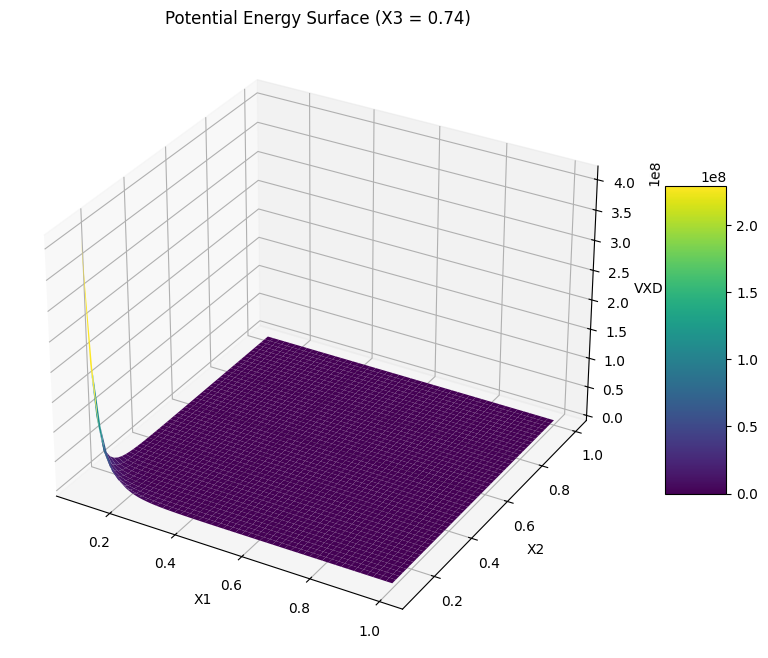

In [12]:
# prompt: write a code to use XD = [0.74, 0.14, 0.74]
# VXD = slth(XD) to plota potential energy surface

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x1_vals = np.linspace(0.1, 1.0, 50)
x2_vals = np.linspace(0.1, 1.0, 50)

X1, X2 = np.meshgrid(x1_vals, x2_vals)

# Calculate VXD for each point in the grid, fixing x3
x3 = 1.04  # Fixed value for x3
VXD_vals = np.zeros_like(X1)
for i in range(len(x1_vals)):
    for j in range(len(x2_vals)):
        VXD_vals[i, j] = slth([x1_vals[i], x2_vals[j], x3])

# Plot the potential energy surface
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X1, X2, VXD_vals, cmap='viridis')

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('VXD')
ax.set_title('Potential Energy Surface (X3 = 0.74)')

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()


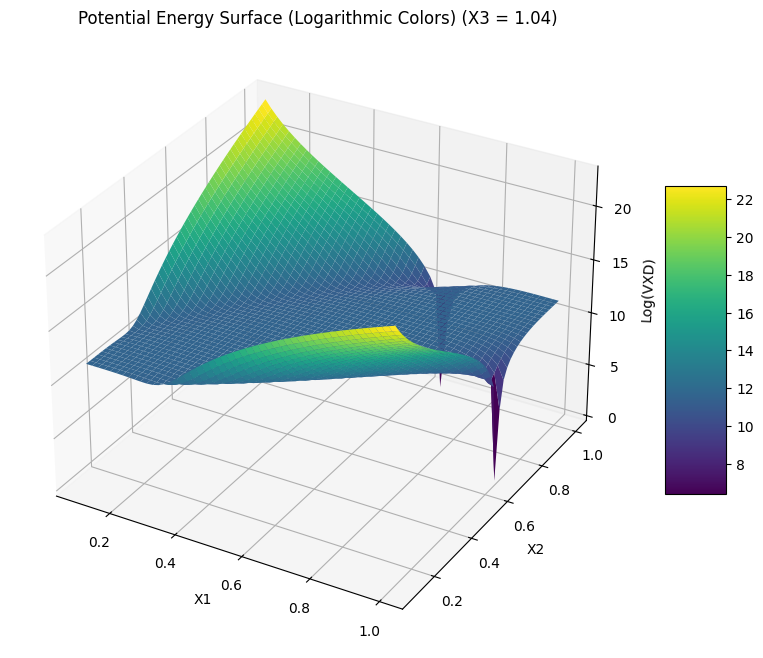

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the slth function (assuming it's already defined)
# from slth_module import slth  # Uncomment this if the slth function is in a separate module

# Define the grid for X1 and X2
x1_vals = np.linspace(0.1, 1.0, 50)
x2_vals = np.linspace(0.1, 1.0, 50)

X1, X2 = np.meshgrid(x1_vals, x2_vals)

# Calculate VXD for each point in the grid, fixing x3
x3 = 0.4  # Fixed value for x3
VXD_vals = np.zeros_like(X1)
for i in range(len(x1_vals)):
    for j in range(len(x2_vals)):
        VXD_vals[i, j] = slth([x1_vals[i], x2_vals[j], x3])

# Apply logarithmic scale to the VXD values
log_VXD_vals = np.log(VXD_vals - np.min(VXD_vals) + 1)  # Shift values to avoid log(0)

# Plot the potential energy surface with logarithmic color scaling
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X1, X2, log_VXD_vals, cmap='viridis')

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Log(VXD)')

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()